## Knn
### 简介
knn算法是一种分类算法，通过判断与预测点附近的训练样本点的类型，从而判断该点的类型，作出预测。用古人的话就是：物以类聚，人以群分。

那么，选周围的样本点的话，要怎么选，选几个呢？我们通常使用交叉验证获取k值，且k值一般为奇数。倘若k为偶数2，且两个最近的点为A类和B类，那么就要考虑权重的问题。
### KD树
kd树是一种高维索引树形数据结构，常用于大规模高维数据密集的查找比对的使用场景中，利用kd树可以省去对大部分数据点的搜索，从而减少搜索的计算量。

kd 树是每个节点均为k维数值点的二叉树，其上的每个节点代表一个超平面，该超平面垂直于当前划分维度的坐标轴，并在该维度上将空间划分为两部分，一部分在其左子树，另一部分在其右子树。即若当前节点的划分维度为d，其左子树上所有点在d维的坐标值均小于当前值，右子树上所有点在d维的坐标值均大于等于当前值，本定义对其任意子节点均成立。
![](kd树.jpg)

In [1]:
from TV_examine.algorithm import knn, kd_tree
from TV_examine.data_preprocessing import preprocessing
from TV_examine.model_assessment import divide_data
import numpy as np
import matplotlib.pyplot as plt

## 导入数据集
导入鸢尾花数据集，查看数据详情
- 数据的大致情况
- 特征标签
- 样本个数

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names, iris.data.shape, iris.target.shape, iris.data

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 (150, 4),
 (150,),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 

## 数据集的可视化
绘制散点图，观测鸢尾花数据集的分布

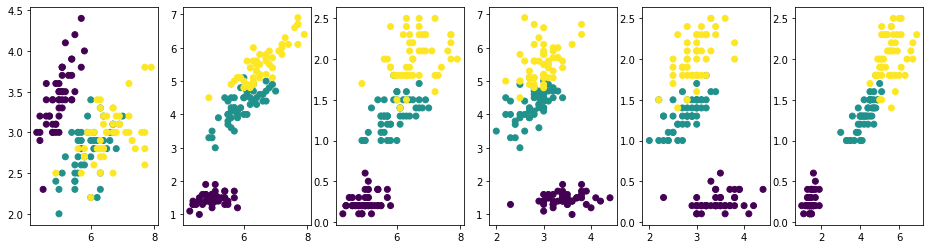

In [3]:
import itertools
X = iris.data
figure,axes=plt.subplots(nrows=1, ncols=6, figsize=(16,4)) 
j=0
for i in list(itertools.combinations(range(4), 2)):
    axes[j].scatter(X[:,i[0]], X[:,i[1]], c=iris.target)
    j+=1

## 数据预处理
- 分类算法knn的度量方式使用了欧式距离，为了消除不同变量之间纲量的不同对数据造成的影响，这里使用标准化消除纲量，其计算公式为**（样本 - 平均值）/ 标准差**
- knn算法需要选择k近邻点的个数，此处遍历k值，从1到21，并使用交叉验证法验证划分模型准确率

In [4]:
stand = preprocessing.Standardization()
X = stand.fit_transform(iris.data)
accuracys = np.empty(21)
for i in range(1, 22):
    kn = knn.KNNclassifier(i)
    accuracys[i-1] = divide_data.cross_validation(kn, X, iris.target, 6)

## 可视化选择适当的k值
利用折线图的方式找到适合的k值，从下图可大致看出k值为10-12左右较佳

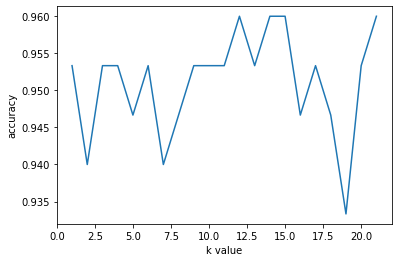

In [5]:
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.plot(range(1,22), accuracys)

## 使用kd树存储数据进行k近邻搜索
- 鸢尾花数据集只有150个样本，样本数据较少，因此使用自助法划分数据集
- 从上图可知k值最佳范围为10-12，这里选择11作为k值

In [6]:
X_train, X_test, y_train, y_test = divide_data.bootstraping(X, iris.target)
kdt = kd_tree.KDTree(X_train, y_train)
y_pr = kdt.predict(np.array(X_test), 11)
"accuracy：", np.sum(y_pr == y_test)/len(y_pr)

正在创建KD树......
创建完毕


('accuracy：', 0.8771929824561403)

## 对比
对比sklearn中的knn，观察结果

差了几个点是什么鬼...

In [7]:
from sklearn.neighbors import KNeighborsClassifier
sk = KNeighborsClassifier(11)
sk.fit(X_train, y_train)
y_pr = sk.predict(X_test)
"accuracy：", np.sum(y_pr == y_test)/len(y_pr)

('accuracy：', 0.9473684210526315)

## 使用多分类逻辑回归构建模型
可以看出鸢尾花数据集中，knn算法比softmax回归算法更优

In [8]:
from TV_examine.algorithm import softmaxregression
sf = softmaxregression.Softmax()
sf.fit(X_train, y_train, n_iters=100)
sf_y_pr = sf.predict(np.array(X_test))
"accuracy：", np.sum(sf_y_pr == y_test)/len(sf_y_pr)

('accuracy：', 0.8070175438596491)